In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nike-sales-nti15/Nike Dataset.csv


In [15]:
import pandas as pd
from scipy import stats

# Load the dataset
file_path = '/kaggle/input/nike-sales-nti15/Nike Dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Initial Data:")
print(data.head())

# 1. Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# 2. Handle missing values
# Fill missing numeric values with the mean and categorical with the mode
data['Price per Unit'] = data['Price per Unit'].fillna(data['Price per Unit'].mean())
data['Total Sales'] = data['Total Sales'].fillna(data['Total Sales'].mean())
data['Units Sold'] = data['Units Sold'].fillna(data['Units Sold'].mean())
data['Region'] = data['Region'].fillna(data['Region'].mode()[0])
data['Retailer'] = data['Retailer'].fillna(data['Retailer'].mode()[0])
data['Sales Method'] = data['Sales Method'].fillna(data['Sales Method'].mode()[0])
data['State'] = data['State'].fillna(data['State'].mode()[0])

# 3. Remove duplicates
data.drop_duplicates(inplace=True)

# 4. Standardize date formats in 'Invoice Date'
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'], errors='coerce')

# 5. Check for any invalid dates that couldn't be parsed
invalid_dates = data[data['Invoice Date'].isnull()]
print("\nInvalid Dates:")
print(invalid_dates)

# 6. Remove rows with invalid dates
data.dropna(subset=['Invoice Date'], inplace=True)

# 7. Check for outliers using z-score
numeric_columns = ['Price per Unit', 'Total Sales', 'Units Sold']
z_scores = stats.zscore(data[numeric_columns])
data = data[(abs(z_scores) < 3).all(axis=1)]  # Remove outliers with z-score greater than 3

# 8. Display cleaned data
print("\nCleaned Data:")
print(data.head())

# Optionally, save the cleaned data to a new CSV file
cleaned_file_path = '/kaggle/working/Nike_Cleaned_Dataset.csv'
data.to_csv(cleaned_file_path, index=False)

print(f"\nCleaned data saved to {cleaned_file_path}")


Initial Data:
  Invoice Date                    Product     Region     Retailer  \
0   01-01-2020      Men's Street Footwear  Northeast  Foot Locker   
1   02-01-2020    Men's Athletic Footwear  Northeast  Foot Locker   
2   03-01-2020    Women's Street Footwear  Northeast  Foot Locker   
3   04-01-2020  Women's Athletic Footwear  Northeast  Foot Locker   
4   05-01-2020              Men's Apparel  Northeast  Foot Locker   

  Sales Method     State  Price per Unit  Total Sales  Units Sold  
0     In-store  New York              50         6000         120  
1     In-store  New York              50         5000         100  
2     In-store  New York              40         4000         100  
3     In-store  New York              45         3825          85  
4     In-store  New York              60         5400          90  

Missing Values:
Invoice Date      0
Product           0
Region            0
Retailer          0
Sales Method      0
State             0
Price per Unit    0
Total 

Cleaned Data:
  Invoice Date                    Product     Region     Retailer  \
0   2020-04-01  Women's Athletic Footwear  Northeast  Foot Locker   
1   2020-08-01    Men's Athletic Footwear  Northeast  Foot Locker   
2   2020-01-02    Men's Athletic Footwear  Northeast  Foot Locker   
3   2020-02-02    Women's Street Footwear  Northeast  Foot Locker   
4   2020-03-02  Women's Athletic Footwear  Northeast  Foot Locker   

  Sales Method     State  Price per Unit  Total Sales  Units Sold  
0     In-store  New York              45         3825          85  
1       Outlet  New York              50         4500          90  
2       Outlet  New York              50         4500          90  
3       Outlet  New York              40         3600          90  
4       Outlet  New York              45         3713          83  

Training Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report (Training Set):
              precision    recall  f1-scor

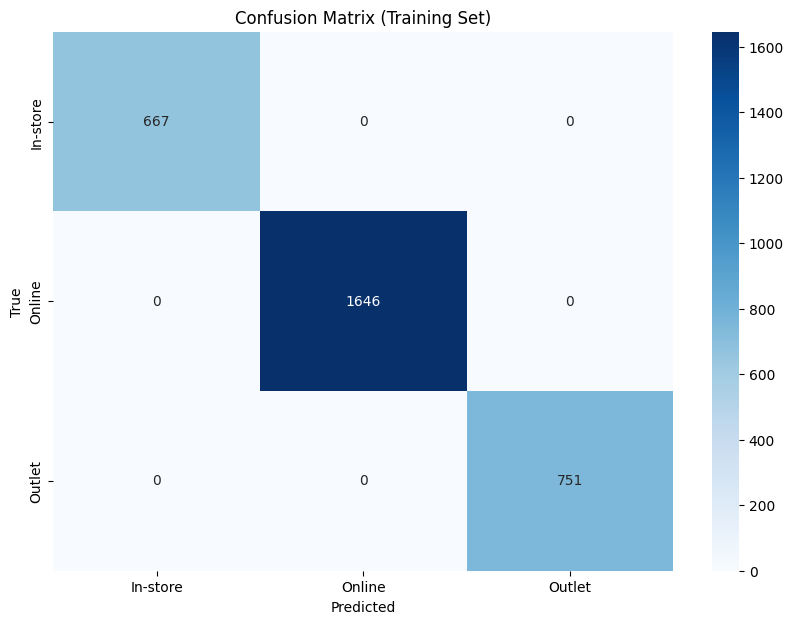

In [23]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress DeprecationWarning messages
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Load the cleaned dataset
file_path = '/kaggle/working/Nike_Cleaned_Dataset.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Cleaned Data:")
print(data.head())

# Define features (X) and target (y)
# Using 'Sales Method' as target, others as features
X = data.drop(columns=['Sales Method'])  # Exclude target variable
y = data['Sales Method']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Step 2: Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Code
# Train the Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Evaluate model performance on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')

print("\nTraining Performance:")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Precision: {precision_train:.2f}")
print(f"Recall: {recall_train:.2f}")
print(f"F1 Score: {f1_train:.2f}")

# Generate a classification report for the training set
class_report_train = classification_report(y_train, y_train_pred, target_names=model.classes_)
print("\nClassification Report (Training Set):")
print(class_report_train)

# Visualize the confusion matrix for the training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



Testing Performance:
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89

Classification Report (Testing Set):
              precision    recall  f1-score   support

    In-store       0.98      0.98      0.98       173
      Online       0.90      0.91      0.90       377
      Outlet       0.82      0.81      0.81       217

    accuracy                           0.89       767
   macro avg       0.90      0.90      0.90       767
weighted avg       0.89      0.89      0.89       767



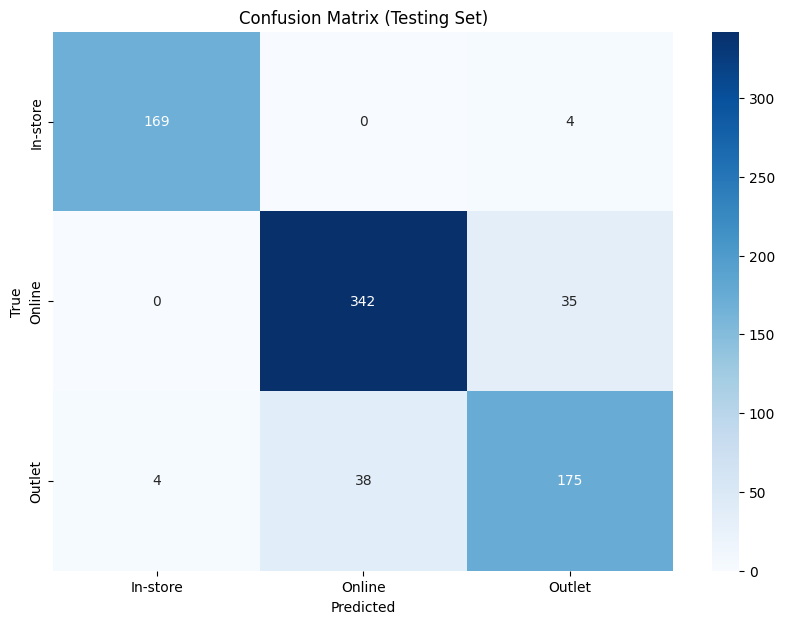

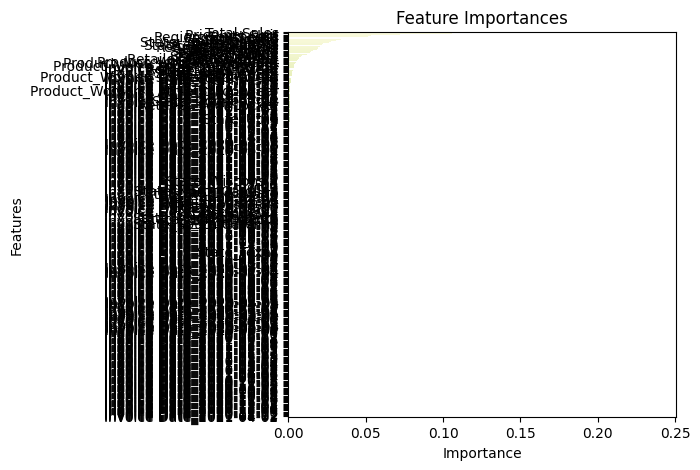

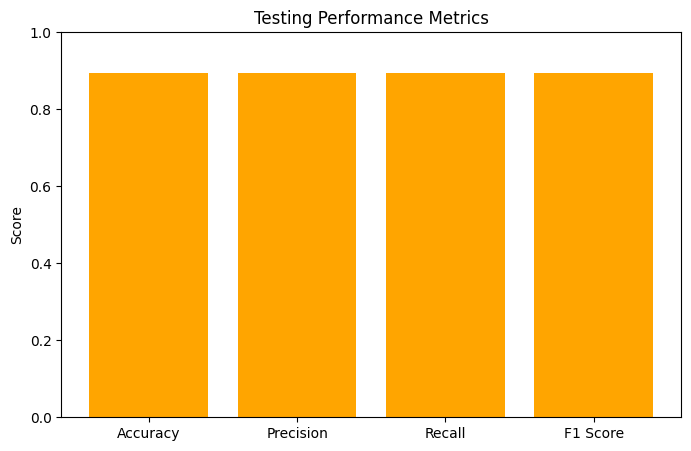

In [24]:
# Testing Code
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance on the testing set
accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, average='weighted')
recall_test = recall_score(y_test, y_pred, average='weighted')
f1_test = f1_score(y_test, y_pred, average='weighted')

print("\nTesting Performance:")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"F1 Score: {f1_test:.2f}")

# Generate a classification report for the testing set
class_report_test = classification_report(y_test, y_pred, target_names=model.classes_)
print("\nClassification Report (Testing Set):")
print(class_report_test)

# Visualize the confusion matrix for the testing set
conf_matrix_test = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix (Testing Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Visualize feature importances as a bar chart
importances = model.feature_importances_
feature_importances_df = pd.DataFrame(importances, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(5, 5))
sns.barplot(x=feature_importances_df['Importance'], y=feature_importances_df.index, palette='YlGnBu')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Visualize performance metrics using a bar chart for testing performance
metrics = {
    'Accuracy': accuracy_test,
    'Precision': precision_test,
    'Recall': recall_test,
    'F1 Score': f1_test
}
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color='orange')
plt.title('Testing Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()


In [20]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Load the cleaned dataset
file_path = '/kaggle/working/Nike_Cleaned_Dataset.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Encode categorical variables for association rule mining
categorical_cols = ['Product', 'Region', 'Retailer', 'Sales Method', 'State']
data_encoded = pd.get_dummies(data[categorical_cols]).astype(bool)

# Apply the Apriori algorithm to find frequent itemsets (minimum support 0.05)
frequent_itemsets = apriori(data_encoded, min_support=0.05, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
     support                                           itemsets
0   0.168624                            (Product_Men's Apparel)
1   0.167058                  (Product_Men's Athletic Footwear)
2   0.160010                    (Product_Men's Street Footwear)
3   0.164187                          (Product_Women's Apparel)
4   0.170452                (Product_Women's Athletic Footwear)
5   0.169668                  (Product_Women's Street Footwear)
6   0.297311                                   (Region_Midwest)
7   0.285826                                 (Region_Northeast)
8   0.090838                                     (Region_South)
9   0.101018                                 (Region_Southeast)
10  0.225007                                      (Region_West)
11  0.089011                                  (Retailer_Amazon)
12  0.264683                             (Retailer_Foot Locker)
13  0.113025                                  (Retailer_Kohl's)
14  0.237797         

Association Rules:
                              antecedents               consequents  \
0                        (Region_Midwest)     (Sales Method_Online)   
1                       (Retailer_Amazon)        (Region_Northeast)   
2                     (State_Connecticut)        (Region_Northeast)   
3                        (State_New York)        (Region_Northeast)   
4                          (Region_South)  (Retailer_Sports Direct)   
5                          (Region_South)     (Sales Method_Outlet)   
6                      (Region_Southeast)     (Sales Method_Online)   
7                           (Region_West)      (Retailer_West Gear)   
8  (Retailer_Foot Locker, Region_Midwest)     (Sales Method_Online)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.297311            0.528061  0.193944    0.652327  1.235325   
1            0.089011            0.285826  0.054816    0.615836  2.154582   
2            0.056382            0.2858

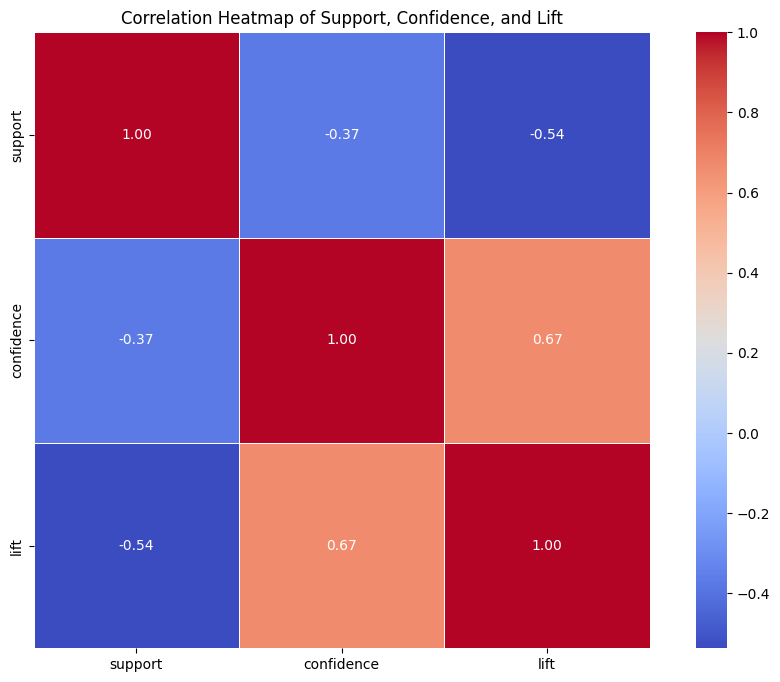

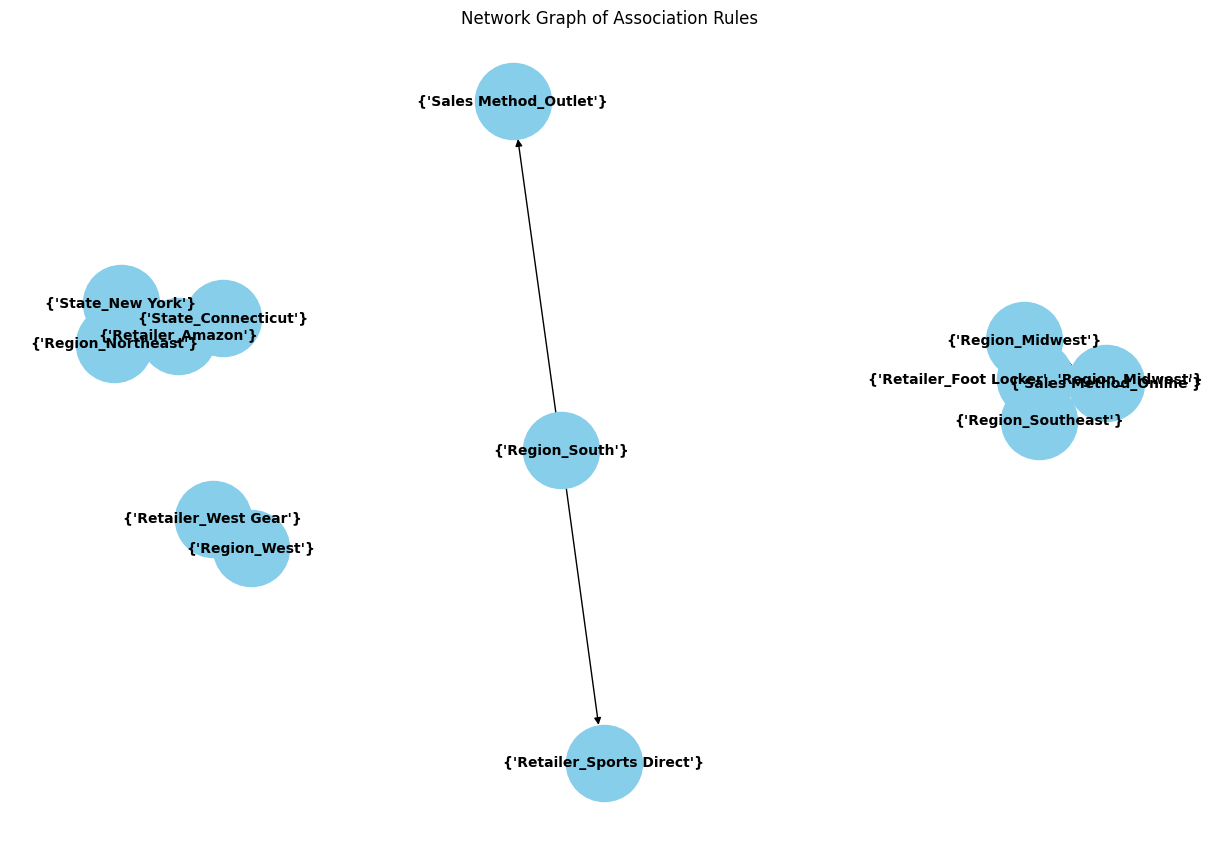

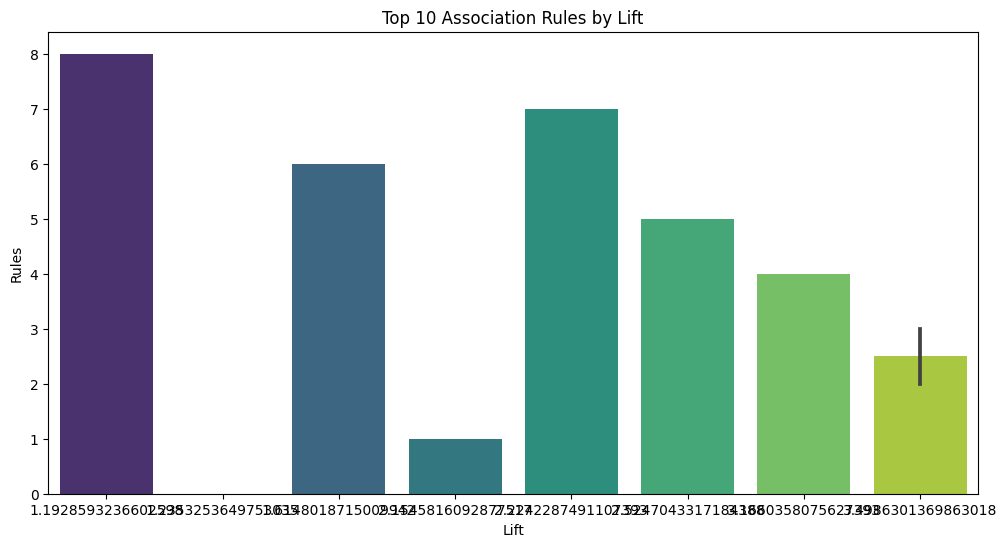

In [21]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
print("Association Rules:")
print(rules)

# Visualize association rules metrics
# Correlation Heatmap of Support, Confidence, and Lift
plt.figure(figsize=(12, 8))
heatmap_data = rules[['support', 'confidence', 'lift']]
sns.heatmap(heatmap_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap of Support, Confidence, and Lift')
plt.show()

# Network Graph of Rules
G = nx.DiGraph()
for _, row in rules.iterrows():
    G.add_edge(f"{set(row['antecedents'])}", f"{set(row['consequents'])}", weight=row['lift'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
plt.title('Network Graph of Association Rules')
plt.show()

# Bar Plot of Top Rules by Lift
top_n = 10  # Change this to the number of top rules you want to display
top_rules = rules.nlargest(top_n, 'lift')

plt.figure(figsize=(12, 6))
sns.barplot(x='lift', y=top_rules.index, data=top_rules, palette='viridis')
plt.title(f'Top {top_n} Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rules')
plt.show()


Dataset:
  Invoice Date                    Product     Region     Retailer  \
0   2020-04-01  Women's Athletic Footwear  Northeast  Foot Locker   
1   2020-08-01    Men's Athletic Footwear  Northeast  Foot Locker   
2   2020-01-02    Men's Athletic Footwear  Northeast  Foot Locker   
3   2020-02-02    Women's Street Footwear  Northeast  Foot Locker   
4   2020-03-02  Women's Athletic Footwear  Northeast  Foot Locker   

  Sales Method     State  Price per Unit  Total Sales  Units Sold  
0     In-store  New York              45         3825          85  
1       Outlet  New York              50         4500          90  
2       Outlet  New York              50         4500          90  
3       Outlet  New York              40         3600          90  
4       Outlet  New York              45         3713          83  


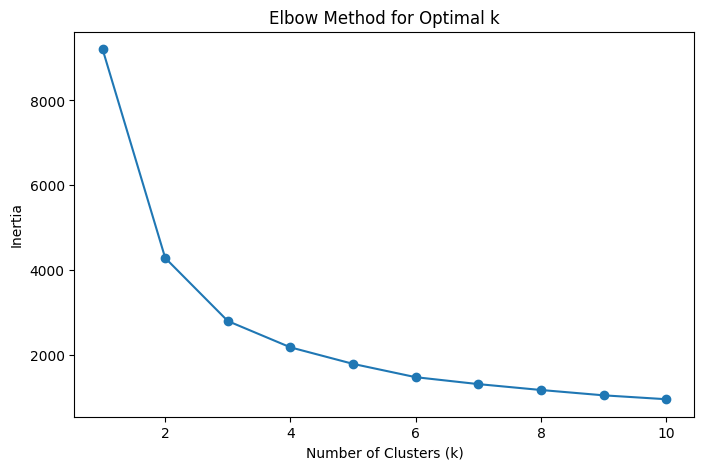


Silhouette Score (Training Data): 0.41


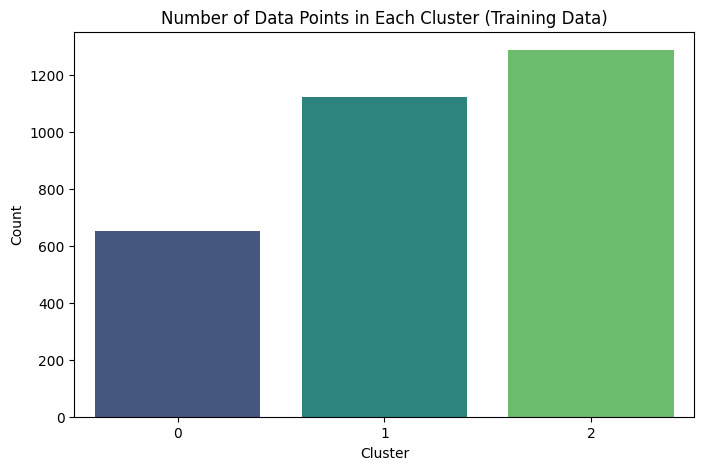

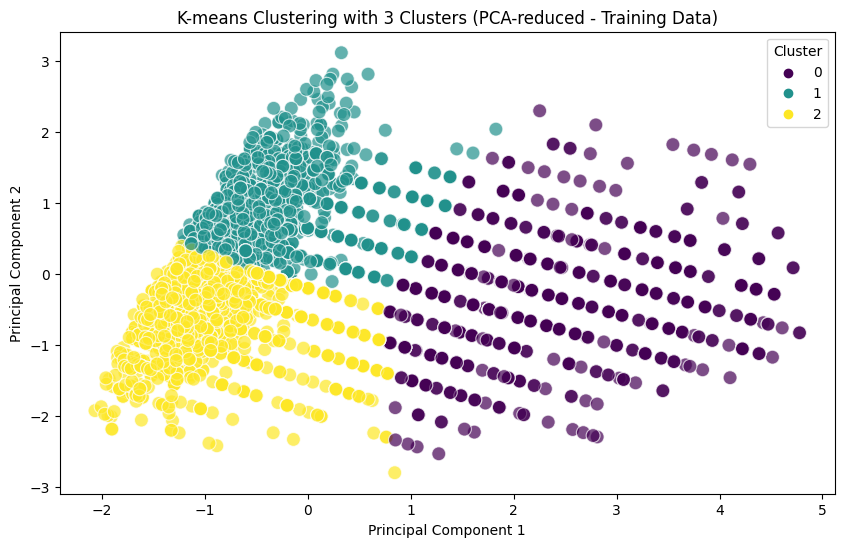


Centroids of each cluster (Training Data):
   Price per Unit  Total Sales  Units Sold
0       49.516871  2913.983129   59.636503
1       51.804270   323.871886   16.317616
2       31.055901   228.855590   16.069099


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
from sklearn.model_selection import train_test_split

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Load the dataset
file_path = '/kaggle/working/Nike_Cleaned_Dataset.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset:")
print(data.head())

# Step 1: Data Preprocessing
# Selecting only numerical columns for clustering
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Standardize the data for K-means
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_data)

# Step 2: Split the data into training and testing sets
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42)

# Step 3: Apply the K-means algorithm on training data
# Choosing the number of clusters (k) using the elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the elbow plot, select the optimal number of clusters
optimal_k = 3  # Update this based on your elbow plot result
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Train on training data
X_train_clusters = kmeans.fit_predict(X_train)

# Step 4: Evaluate the clustering performance using Silhouette Score on training data
silhouette_train = silhouette_score(X_train, X_train_clusters)
print(f"\nSilhouette Score (Training Data): {silhouette_train:.2f}")

# Step 5: Visualize the Clusters (Training Data)
# 5.1: Bar chart of data points per cluster in the training set
plt.figure(figsize=(8, 5))
sns.countplot(x=X_train_clusters, palette='viridis')
plt.title('Number of Data Points in Each Cluster (Training Data)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# 5.2: Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
data_train_pca = pd.DataFrame(X_train_pca, columns=['PCA1', 'PCA2'])
data_train_pca['Cluster'] = X_train_clusters

# Plot the clusters for the training data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data_train_pca, palette='viridis', s=100, alpha=0.7)
plt.title(f'K-means Clustering with {optimal_k} Clusters (PCA-reduced - Training Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Display the centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("\nCentroids of each cluster (Training Data):")
print(pd.DataFrame(centroids, columns=numerical_data.columns))

Dataset:
  Invoice Date                    Product     Region     Retailer  \
0   2020-04-01  Women's Athletic Footwear  Northeast  Foot Locker   
1   2020-08-01    Men's Athletic Footwear  Northeast  Foot Locker   
2   2020-01-02    Men's Athletic Footwear  Northeast  Foot Locker   
3   2020-02-02    Women's Street Footwear  Northeast  Foot Locker   
4   2020-03-02  Women's Athletic Footwear  Northeast  Foot Locker   

  Sales Method     State  Price per Unit  Total Sales  Units Sold  
0     In-store  New York              45         3825          85  
1       Outlet  New York              50         4500          90  
2       Outlet  New York              50         4500          90  
3       Outlet  New York              40         3600          90  
4       Outlet  New York              45         3713          83  

Silhouette Score (Testing Data): 0.41


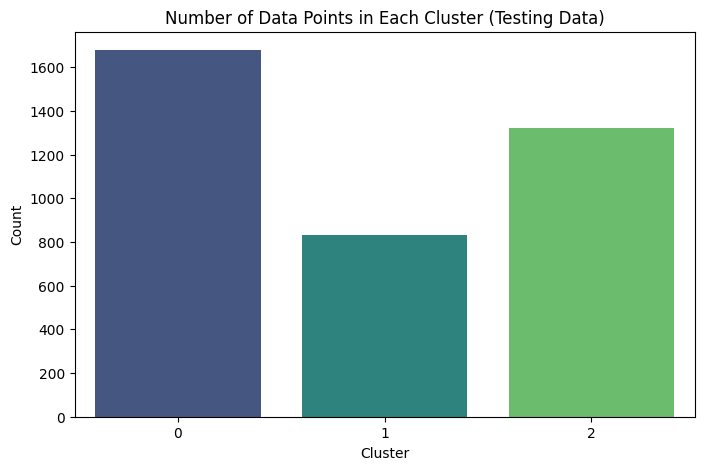

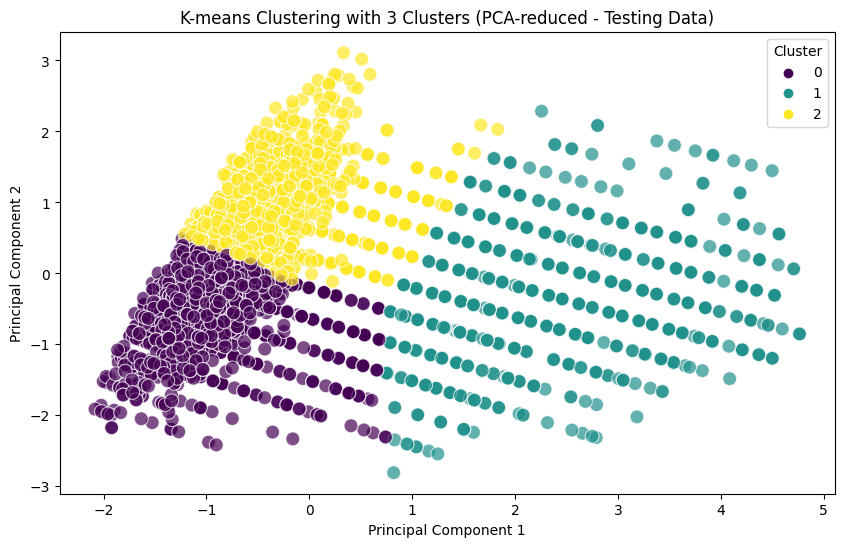


Centroids of each cluster (Testing Data):
   Price per Unit  Total Sales  Units Sold
0       31.731983   215.634306   15.768314
1       49.470517  2896.310469   59.377858
2       52.260409   340.150643   16.549584


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Load the dataset (assuming it's the same cleaned dataset)
file_path = '/kaggle/working/Nike_Cleaned_Dataset.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset:")
print(data.head())

# Step 1: Data Preprocessing
# Selecting only numerical columns for clustering
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Standardize the data for K-means (using the same scaler from training)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_data)

# Step 2: Apply the K-means algorithm on testing data (using the model trained in the training phase)
optimal_k = 3  # Ensure this matches the number selected during training

# Initialize and fit the K-means model with the training data
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_scaled)  # This is important to train the model

# Apply the K-means model to the testing data (after fitting)
X_test_clusters = kmeans.predict(data_scaled)

# Step 3: Evaluate the clustering performance using Silhouette Score on testing data
silhouette_test = silhouette_score(data_scaled, X_test_clusters)
print(f"\nSilhouette Score (Testing Data): {silhouette_test:.2f}")

# Step 4: Visualize the Clusters (Testing Data)
# 4.1: Bar chart of data points per cluster in the testing set
plt.figure(figsize=(8, 5))
sns.countplot(x=X_test_clusters, palette='viridis')
plt.title('Number of Data Points in Each Cluster (Testing Data)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# 4.2: Apply PCA to reduce dimensions to 2 for visualization (Testing Data)
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(data_scaled)
data_test_pca = pd.DataFrame(X_test_pca, columns=['PCA1', 'PCA2'])
data_test_pca['Cluster'] = X_test_clusters

# Plot the clusters for the testing data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data_test_pca, palette='viridis', s=100, alpha=0.7)
plt.title(f'K-means Clustering with {optimal_k} Clusters (PCA-reduced - Testing Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Display the centroids (same as the training phase for consistency)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("\nCentroids of each cluster (Testing Data):")
print(pd.DataFrame(centroids, columns=numerical_data.columns))


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
import joblib
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Load the dataset
file_path = '/kaggle/working/Nike_Cleaned_Dataset.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Step 1: Data Preprocessing
# Create a binary target for high and low sales based on a threshold
sales_threshold = data['Total Sales'].median()  # Use median as a cutoff point
data['Sales_Category'] = ['High' if x > sales_threshold else 'Low' for x in data['Total Sales']]

# Select features and target variable
features = ['Price per Unit', 'Total Sales', 'Units Sold']
X = data[features]
y = data['Sales_Category']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 2: Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Save the model, scaler, and label encoder for later use
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

print("Training completed and model saved.")


Training completed and model saved.


Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.96      0.98       594
         Low       0.96      1.00      0.98       556

    accuracy                           0.98      1150
   macro avg       0.98      0.98      0.98      1150
weighted avg       0.98      0.98      0.98      1150

Confusion Matrix:
[[569  25]
 [  2 554]]


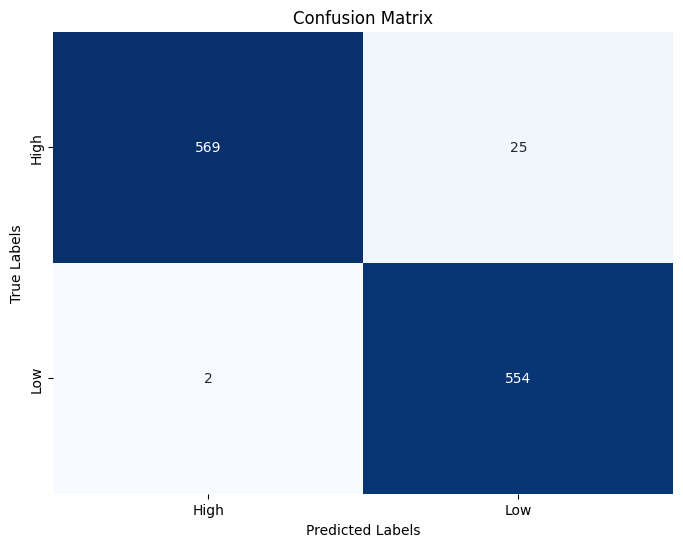


Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


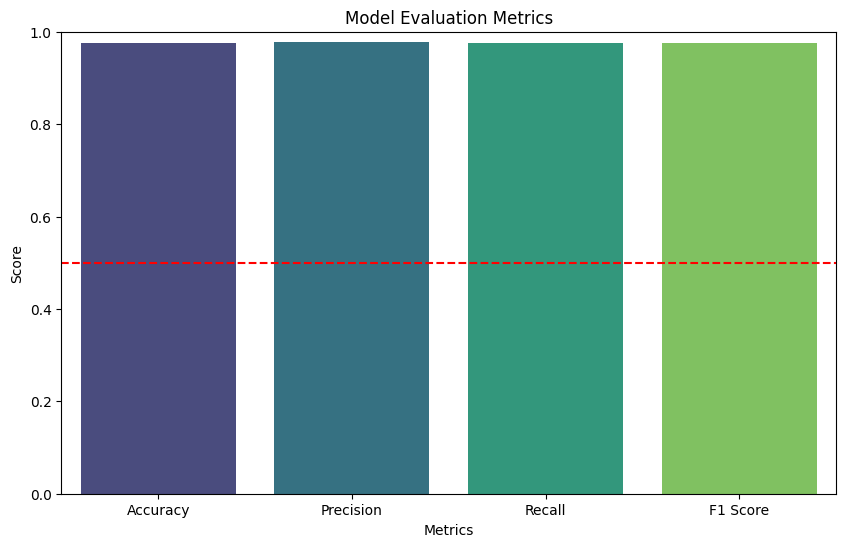

In [33]:
import pandas as pd
import joblib
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                             precision_score, recall_score, f1_score)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the model, scaler, and label encoder
scaler = joblib.load('scaler.pkl')
svm_model = joblib.load('svm_model.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# Load the dataset (again, as we only saved the model and scaler)
file_path = '/kaggle/working/Nike_Cleaned_Dataset.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Step 1: Data Preprocessing
sales_threshold = data['Total Sales'].median()  # Use median as a cutoff point
data['Sales_Category'] = ['High' if x > sales_threshold else 'Low' for x in data['Total Sales']]

# Select features and target variable
features = ['Price per Unit', 'Total Sales', 'Units Sold']
X = data[features]
y = data['Sales_Category']

# Encode the target variable
y = label_encoder.transform(y)

# Standardize the features using the previously fitted scaler
X_scaled = scaler.transform(X)

# Split the data into training and test sets (using the same split as during training)
# Alternatively, you can directly use the test data from the original split above.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 2: Predict on the test set
y_pred = svm_model.predict(X_test)

# Step 3: Evaluate the Model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualization of the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Create a bar chart for evaluation metrics
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Plotting the metrics
plt.figure(figsize=(10, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.axhline(y=0.5, color='r', linestyle='--')  # Optional: add a horizontal line at 0.5 for reference
plt.show()
